In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
# load data
df=pd.read_csv('nba_data.csv')

In [3]:
# look at data
df.head()

,Unnamed: 0,name,pos,age,team,gp,gs,mp,fg,fga,...,trb,ast,stl,blk,tov,fouls,pts,Year,school,selection
0,0,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,...,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950,NaN,NaN
1,1,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,...,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950,NaN,NaN
2,2,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,...,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950,NaN,NaN
3,3,Ed Bartels,F,24,NYK,15,NaN,NaN,1.5,5.7,...,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950,NaN,NaN
4,4,Ralph Beard,G,22,INO,60,NaN,NaN,5.7,15.6,...,NaN,3.9,NaN,NaN,NaN,2.2,14.9,1950,NaN,NaN


In [4]:
# pick my season
df=df[df.Year==2019]

In [5]:
df.head()

,Unnamed: 0,name,pos,age,team,gp,gs,mp,fg,fga,...,trb,ast,stl,blk,tov,fouls,pts,Year,school,selection
20826,20826,Álex Abrines,SG,25,OKC,31,2.0,19.0,1.8,5.1,...,1.5,0.6,0.5,0.2,0.5,1.7,5.3,2019,NaN,NaN
20827,20827,Quincy Acy,PF,28,PHO,10,0.0,12.3,0.4,1.8,...,2.5,0.8,0.1,0.4,0.4,2.4,1.7,2019,Baylor,74.0
20828,20828,Jaylen Adams,PG,22,ATL,34,1.0,12.6,1.1,3.2,...,1.8,1.9,0.4,0.1,0.8,1.3,3.2,2019,St. Bonaventure,84.0
20829,20829,Steven Adams,C,25,OKC,80,80.0,33.4,6.0,10.1,...,9.5,1.6,1.5,1.0,1.7,2.6,13.9,2019,Pittsburgh,12.0
20830,20830,Bam Adebayo,C,21,MIA,82,28.0,23.3,3.4,5.9,...,7.3,2.2,0.9,0.8,1.5,2.5,8.9,2019,Kentucky,14.0


In [6]:
# ok so now I will need to create a custom dictionary to see whether or not teams made the playoffs

In [7]:
# first let's see how each team is represented
df.team.unique()

array(['OKC', 'PHO', 'ATL', 'MIA', 'CLE', 'DEN', 'SAS', 'CHI', 'UTA',
       'BRK', 'NYK', 'POR', 'MEM', 'IND', 'MIL', 'DAL', 'HOU', 'TOR',
       'WAS', 'ORL', 'CHO', 'SAC', 'LAL', 'MIN', 'BOS', 'GSW', 'NOP',
       'LAC', 'PHI', 'DET'], dtype=object)

In [8]:
# creating my dictionary using binary
playoffs_dict={
    'OKC':1,'PHO':0,'ATL':0,'MIA':0,'CLE':0,'DEN':1,'SAS':1,'CHI':0,'UTA':1,'BRK':1,'NYK':0,'POR':1,'MEM':0,'IND':1,
    'MIL':1,'DAL':0,'HOU':1,'TOR':1,'WAS':0,'ORL':1,'CHO':0,'SAC':0,'LAL':0,'MIN':0,'BOS':1,'GSW':1,'NOP':0,'LAC':1,
    'PHI':1,'DET':1
}

In [9]:
# does this add to 16?
np.sum(list(playoffs_dict.values()))

16

In [10]:
# yup

In [11]:
# add playoff binary
df['playoffs']=df.team
df['playoffs']=df['playoffs'].map(lambda x: playoffs_dict[x])

In [12]:
# preview of new variable on un-sorted data
df.playoffs

20826    1
20827    0
20828    0
20829    1
20830    0
        ..
21351    0
21352    0
21353    0
21354    0
21355    1
Name: playoffs, Length: 530, dtype: int64

In [13]:
# sort data
df=df.sort_values(by='team')

In [14]:
df.head()

,Unnamed: 0,name,pos,age,team,gp,gs,mp,fg,fga,...,ast,stl,blk,tov,fouls,pts,Year,school,selection,playoffs
20933,20933,John Collins,PF,21,ATL,61,59.0,30.0,7.6,13.6,...,2.0,0.4,0.6,2.0,3.3,19.5,2019,Wake Forest,19.0,0
21325,21325,Taurean Prince,SF,24,ATL,55,47.0,28.2,4.8,10.8,...,2.1,1.0,0.3,1.8,2.6,13.5,2019,Baylor,12.0,0
21028,21028,Daniel Hamilton,SG,23,ATL,19,3.0,10.7,1.2,3.2,...,1.2,0.3,0.1,0.8,1.0,3.0,2019,Connecticut,112.0,0
21125,21125,Alex Len,C,25,ATL,77,31.0,20.1,4.2,8.4,...,1.1,0.4,0.9,1.3,2.6,11.1,2019,Maryland,5.0,0
20864,20864,Kent Bazemore,SG,29,ATL,67,35.0,24.5,4.1,10.3,...,2.3,1.3,0.6,1.8,2.5,11.6,2019,NaN,NaN,0


In [15]:
# look at dtypes and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 20933 to 20956
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  530 non-null    int64  
 1   name        530 non-null    object 
 2   pos         530 non-null    object 
 3   age         530 non-null    int64  
 4   team        530 non-null    object 
 5   gp          530 non-null    int64  
 6   gs          530 non-null    float64
 7   mp          530 non-null    float64
 8   fg          530 non-null    float64
 9   fga         530 non-null    float64
 10  fg%         526 non-null    float64
 11  3p          530 non-null    float64
 12  3pa         530 non-null    float64
 13  3p%         494 non-null    float64
 14  2p          530 non-null    float64
 15  2pa         530 non-null    float64
 16  2p%         520 non-null    float64
 17  efg%        526 non-null    float64
 18  ft          530 non-null    float64
 19  fta         530 non-nul

In [16]:
# fill missing values
df.school.fillna('UNK',inplace=True)
for col in ['efg%','3p%','2p%','ft%','fg%']:
    df[col].fillna(df[col].mean(),inplace=True)

In [17]:
# selection must be a whole number
df.selection.mean()

33.96820809248555

In [18]:
# fill using 34
df.selection.fillna(34,inplace=True)

In [19]:
# look at dtypes and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 20933 to 20956
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  530 non-null    int64  
 1   name        530 non-null    object 
 2   pos         530 non-null    object 
 3   age         530 non-null    int64  
 4   team        530 non-null    object 
 5   gp          530 non-null    int64  
 6   gs          530 non-null    float64
 7   mp          530 non-null    float64
 8   fg          530 non-null    float64
 9   fga         530 non-null    float64
 10  fg%         530 non-null    float64
 11  3p          530 non-null    float64
 12  3pa         530 non-null    float64
 13  3p%         530 non-null    float64
 14  2p          530 non-null    float64
 15  2pa         530 non-null    float64
 16  2p%         530 non-null    float64
 17  efg%        530 non-null    float64
 18  ft          530 non-null    float64
 19  fta         530 non-nul

In [20]:
df.head()

,Unnamed: 0,name,pos,age,team,gp,gs,mp,fg,fga,...,ast,stl,blk,tov,fouls,pts,Year,school,selection,playoffs
20933,20933,John Collins,PF,21,ATL,61,59.0,30.0,7.6,13.6,...,2.0,0.4,0.6,2.0,3.3,19.5,2019,Wake Forest,19.0,0
21325,21325,Taurean Prince,SF,24,ATL,55,47.0,28.2,4.8,10.8,...,2.1,1.0,0.3,1.8,2.6,13.5,2019,Baylor,12.0,0
21028,21028,Daniel Hamilton,SG,23,ATL,19,3.0,10.7,1.2,3.2,...,1.2,0.3,0.1,0.8,1.0,3.0,2019,Connecticut,112.0,0
21125,21125,Alex Len,C,25,ATL,77,31.0,20.1,4.2,8.4,...,1.1,0.4,0.9,1.3,2.6,11.1,2019,Maryland,5.0,0
20864,20864,Kent Bazemore,SG,29,ATL,67,35.0,24.5,4.1,10.3,...,2.3,1.3,0.6,1.8,2.5,11.6,2019,UNK,34.0,0


In [21]:
# get rid of useless data
df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
df.head()

,name,pos,age,team,gp,gs,mp,fg,fga,fg%,...,ast,stl,blk,tov,fouls,pts,Year,school,selection,playoffs
20933,John Collins,PF,21,ATL,61,59.0,30.0,7.6,13.6,0.560,...,2.0,0.4,0.6,2.0,3.3,19.5,2019,Wake Forest,19.0,0
21325,Taurean Prince,SF,24,ATL,55,47.0,28.2,4.8,10.8,0.441,...,2.1,1.0,0.3,1.8,2.6,13.5,2019,Baylor,12.0,0
21028,Daniel Hamilton,SG,23,ATL,19,3.0,10.7,1.2,3.2,0.383,...,1.2,0.3,0.1,0.8,1.0,3.0,2019,Connecticut,112.0,0
21125,Alex Len,C,25,ATL,77,31.0,20.1,4.2,8.4,0.494,...,1.1,0.4,0.9,1.3,2.6,11.1,2019,Maryland,5.0,0
20864,Kent Bazemore,SG,29,ATL,67,35.0,24.5,4.1,10.3,0.402,...,2.3,1.3,0.6,1.8,2.5,11.6,2019,UNK,34.0,0


In [23]:
# deal with categorical data
df.select_dtypes(include='O')

,name,pos,team,school
20933,John Collins,PF,ATL,Wake Forest
21325,Taurean Prince,SF,ATL,Baylor
21028,Daniel Hamilton,SG,ATL,Connecticut
21125,Alex Len,C,ATL,Maryland
20864,Kent Bazemore,SG,ATL,UNK
...,...,...,...,...
20865,Bradley Beal,SG,WAS,Florida
21148,Ian Mahinmi,C,WAS,Le Havre
21166,Jordan McRae,SG,WAS,Tennessee
21263,Tomáš Satoranský,PG,WAS,UNK


In [24]:
# any weird values?
df[df.pos=='PF-C']

,name,pos,age,team,gp,gs,mp,fg,fga,fg%,...,ast,stl,blk,tov,fouls,pts,Year,school,selection,playoffs
21281,Jason Smith,PF-C,32,NOP,20,1.0,9.5,1.1,3.0,0.356,...,0.7,0.2,0.4,0.7,1.5,3.3,2019,Colorado State,20.0,0


In [25]:
# replace weird values
for i in range(len(df)):
    if df.pos.iloc[i][0]=='C':
        df.pos.iloc[i]='C'
    elif df.pos.iloc[i][0:2] == 'PF':
        df.pos.iloc[i]='PF'
    elif df.pos.iloc[i][0:2] == 'SF':
        df.pos.iloc[i]='SF'
    elif df.pos.iloc[i][0:2] == 'SG':
        df.pos.iloc[i]='SG'
    else:
        df.pos.iloc[i]='PG'

In [26]:
# categorical data
df.select_dtypes(include='O')

,name,pos,team,school
20933,John Collins,PF,ATL,Wake Forest
21325,Taurean Prince,SF,ATL,Baylor
21028,Daniel Hamilton,SG,ATL,Connecticut
21125,Alex Len,C,ATL,Maryland
20864,Kent Bazemore,SG,ATL,UNK
...,...,...,...,...
20865,Bradley Beal,SG,WAS,Florida
21148,Ian Mahinmi,C,WAS,Le Havre
21166,Jordan McRae,SG,WAS,Tennessee
21263,Tomáš Satoranský,PG,WAS,UNK


## EDA

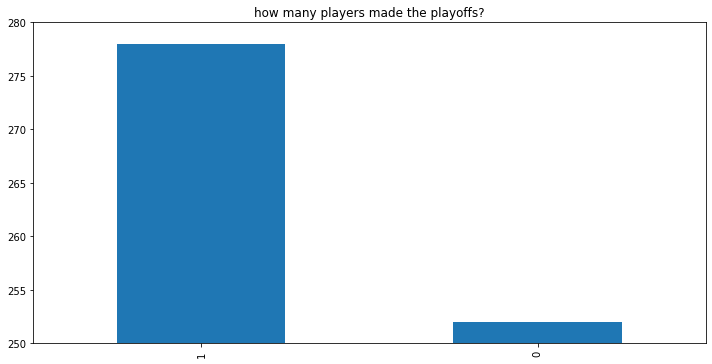

In [27]:
plt.figure(figsize=(10,5))
df.playoffs.value_counts().plot(kind='bar')
plt.ylim(250,280)
plt.tight_layout()
plt.title('how many players made the playoffs?')
plt.show()

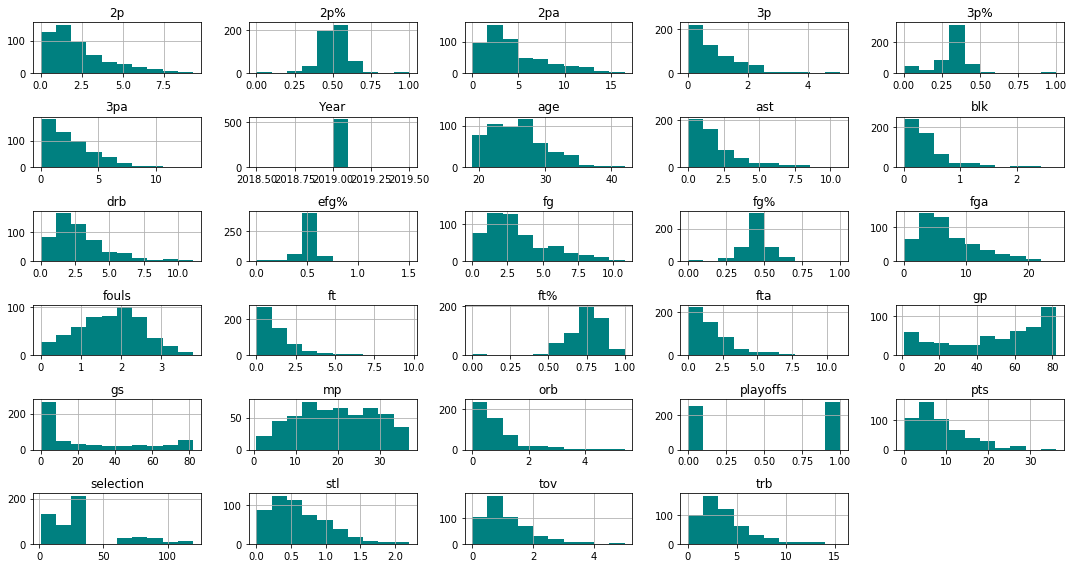

In [28]:
df.hist(color='teal',figsize=(15,8))
plt.tight_layout()
plt.title('histogram of all 2019 player stats')
plt.show()

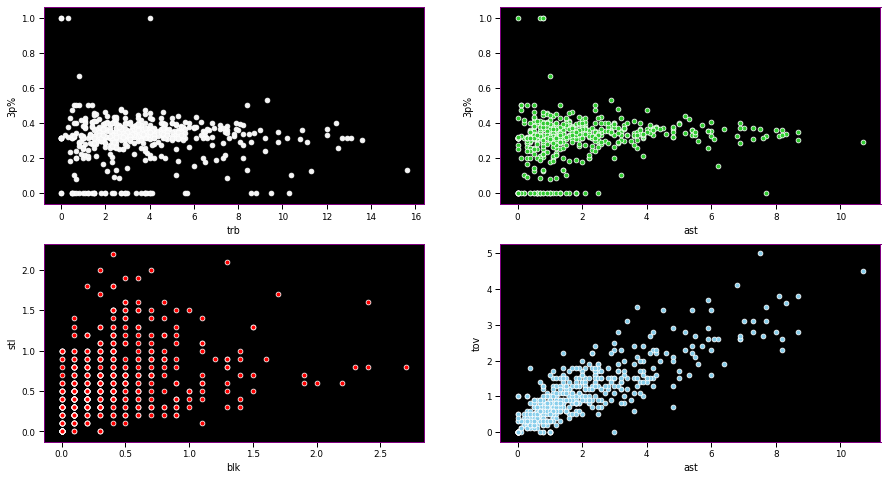

In [29]:
with sns.plotting_context('paper'):
    with sns.axes_style({'axes.facecolor':'black','axes.edgecolor':'purple'}):
    
        plt.figure(figsize=(15,8))
        
        plt.subplot(2,2,1)
        sns.scatterplot(df.trb,df['3p%'],color='whitesmoke')
        
        plt.subplot(2,2,2)
        sns.scatterplot(df.ast,df['3p%'],color='limegreen')
        
        plt.subplot(2,2,3)
        sns.scatterplot(df.blk,df['stl'],color='red')
        
        plt.subplot(2,2,4)
        sns.scatterplot(df.ast,df['tov'],color='skyblue')
        
        plt.show()

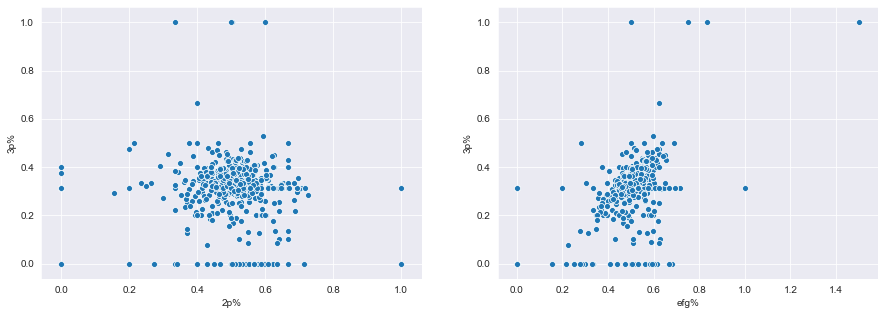

In [30]:
with sns.axes_style('darkgrid'):   
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.scatterplot(df['2p%'],df['3p%'])
    plt.subplot(1,2,2)
    sns.scatterplot(df['efg%'],df['3p%'])
    plt.show()

In [31]:
df.pos.value_counts()

SG    136
PF    107
PG    106
C      95
SF     86
Name: pos, dtype: int64

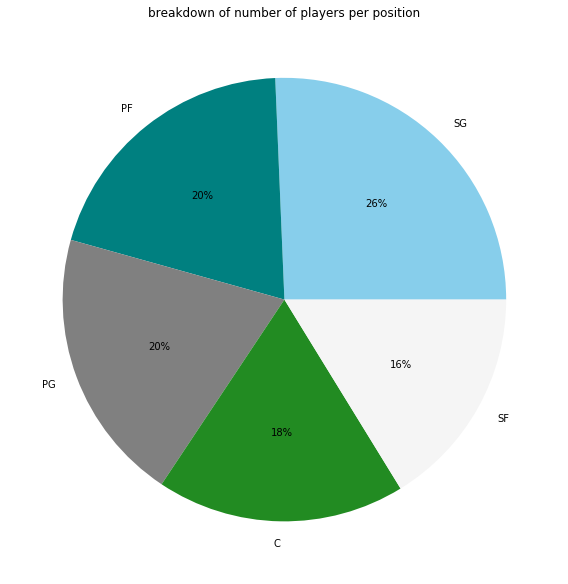

In [32]:
plt.figure(figsize=(15,8))
plt.pie(labels=['SG','PF','PG','C','SF'],x=[136,106,106,96,86],autopct='%1.0f%%',colors=['skyblue','teal','grey','forestgreen','whitesmoke'])
plt.tight_layout()
plt.title('breakdown of number of players per position')
plt.show()

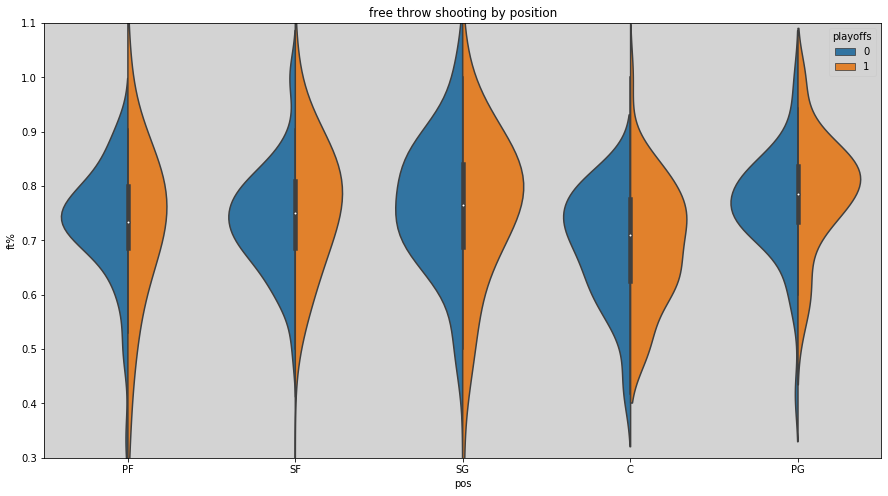

In [33]:
with sns.axes_style({'axes.facecolor': 'lightgray','axes.edgecolor': 'black'}):       
    plt.figure(figsize=(15,8))
    sns.violinplot(df.pos,df['ft%'],colors=['gold','white'],hue=df.playoffs,split=True)
    plt.title('free throw shooting by position')
    plt.ylim(0.3,1.1)
    plt.show()

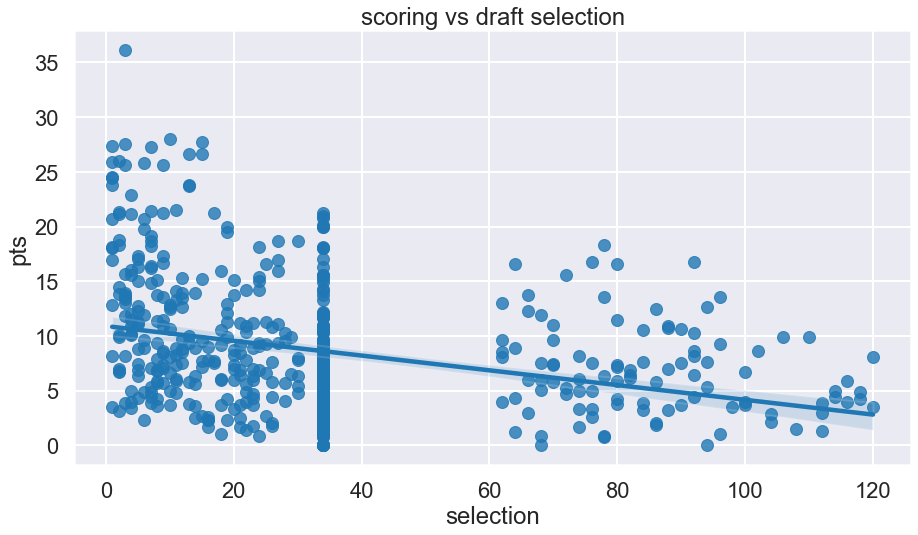

In [34]:
with sns.plotting_context('poster'):
    with sns.axes_style('darkgrid'):
        plt.figure(figsize=(15,8))
        sns.regplot(df.selection,df.pts)
        plt.title('scoring vs draft selection')
        plt.show()

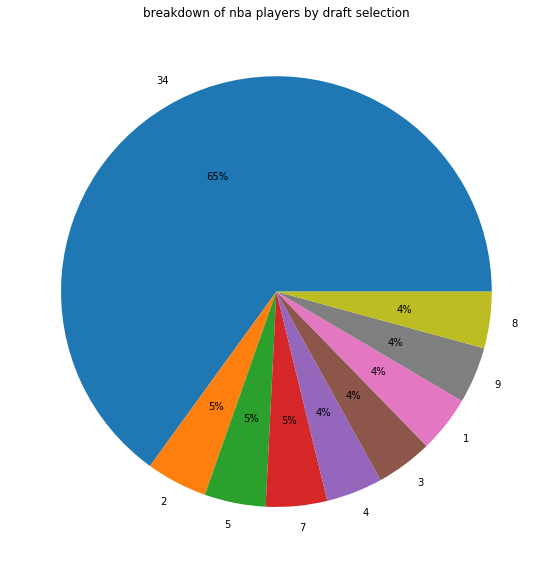

In [35]:
plt.figure(figsize=(15,8))
plt.pie(labels=[34,2,5,7,4,3,1,9,8],x=[184,13,13,13,12,12,12,12,12],autopct='%1.0f%%')
plt.title('breakdown of nba players by draft selection')
plt.tight_layout()
plt.show()

In [36]:
df.selection.value_counts()

34.0     184
2.0       13
5.0       13
7.0       13
9.0       12
        ... 
108.0      1
98.0       1
106.0      1
110.0      1
102.0      1
Name: selection, Length: 61, dtype: int64

In [37]:
(df[df.selection!=34].selection.value_counts())

2.0      13
5.0      13
7.0      13
4.0      12
3.0      12
1.0      12
9.0      12
8.0      11
10.0      9
11.0      9
23.0      9
24.0      8
20.0      8
22.0      8
19.0      8
12.0      8
21.0      8
6.0       8
15.0      7
18.0      7
13.0      7
80.0      7
30.0      6
92.0      6
68.0      6
26.0      6
16.0      6
14.0      6
78.0      5
25.0      5
74.0      5
62.0      5
70.0      5
76.0      5
27.0      5
84.0      4
66.0      4
28.0      4
86.0      4
94.0      4
88.0      4
64.0      4
82.0      3
100.0     3
17.0      3
72.0      3
90.0      3
96.0      3
112.0     3
120.0     2
116.0     2
104.0     2
29.0      2
114.0     2
118.0     2
108.0     1
98.0      1
106.0     1
110.0     1
102.0     1
Name: selection, dtype: int64

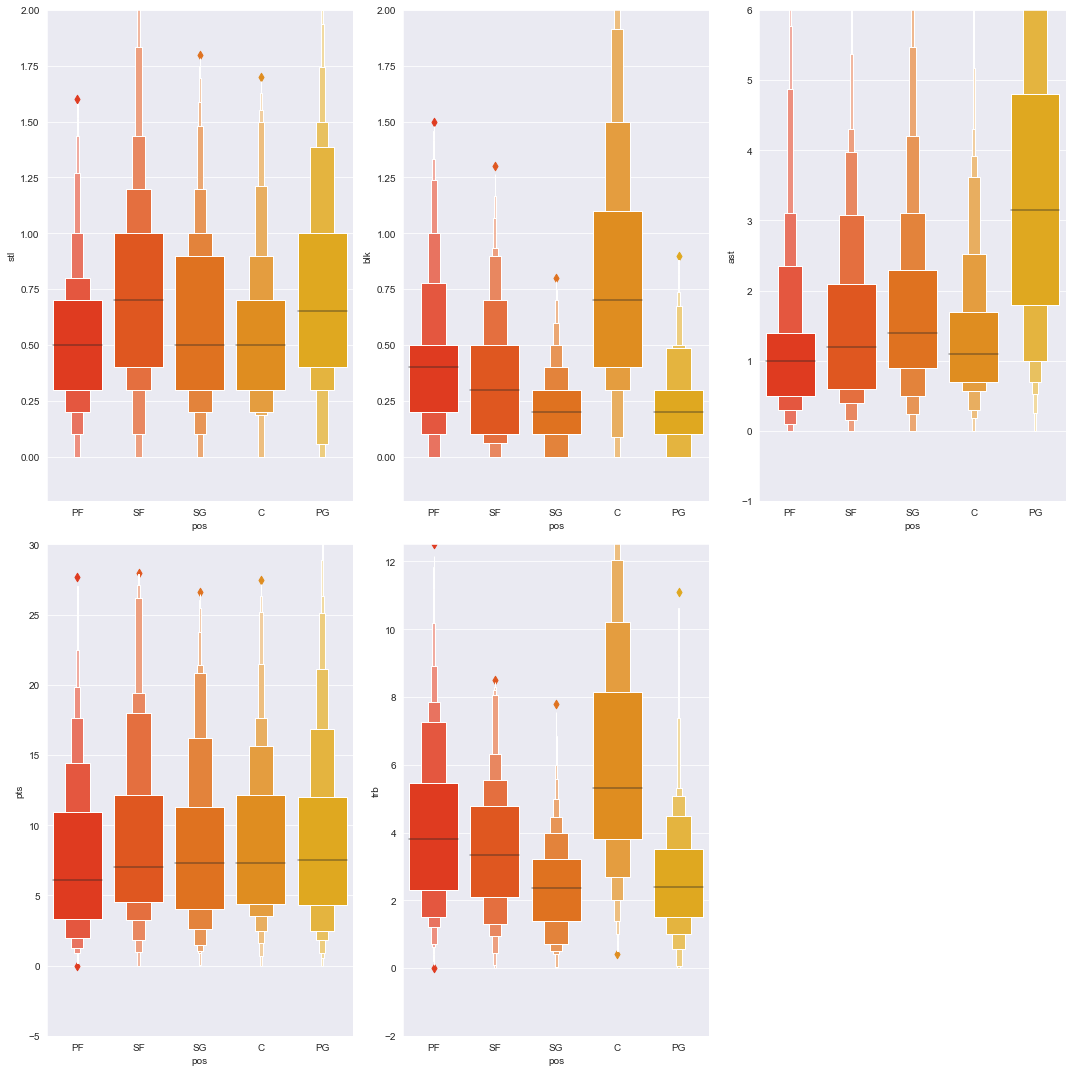

In [38]:
with sns.color_palette('autumn'):
    with sns.axes_style('darkgrid'):
        
        plt.figure(figsize=(15,15))
        
        plt.subplot(2,3,1)
        sns.boxenplot(df.pos,df.stl)
        plt.tight_layout()
        plt.ylim(-0.2,2)
        
        plt.subplot(2,3,2)
        sns.boxenplot(df.pos,df.blk)
        plt.tight_layout()
        plt.ylim(-0.2,2)
        
        plt.subplot(2,3,3)
        sns.boxenplot(df.pos,df.ast)
        plt.tight_layout()
        plt.ylim(-1,6)
        
        plt.subplot(2,3,4)
        sns.boxenplot(df.pos,df.pts)
        plt.tight_layout()
        plt.ylim(-5,30)
        
        plt.subplot(2,3,5)
        sns.boxenplot(df.pos,df.trb)
        plt.tight_layout()
        plt.ylim(-2,12.5)
        
        plt.show()

## END EDA

In [39]:
# ok, so look at the categorical data - none of it matters except maybe position - i'm dropping it
df=df.select_dtypes(exclude='O')

In [40]:
# year is never changing and therefore not needed
df.drop('Year',axis=1,inplace=True)

In [41]:
df.head()

,age,gp,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,drb,trb,ast,stl,blk,tov,fouls,pts,selection,playoffs
20933,21,61,59.0,30.0,7.6,13.6,0.560,0.9,2.6,0.348,...,6.2,9.8,2.0,0.4,0.6,2.0,3.3,19.5,19.0,0
21325,24,55,47.0,28.2,4.8,10.8,0.441,2.2,5.7,0.390,...,3.2,3.6,2.1,1.0,0.3,1.8,2.6,13.5,12.0,0
21028,23,19,3.0,10.7,1.2,3.2,0.383,0.4,1.2,0.348,...,1.9,2.5,1.2,0.3,0.1,0.8,1.0,3.0,112.0,0
21125,25,77,31.0,20.1,4.2,8.4,0.494,1.0,2.6,0.363,...,3.5,5.5,1.1,0.4,0.9,1.3,2.6,11.1,5.0,0
20864,29,67,35.0,24.5,4.1,10.3,0.402,1.4,4.5,0.320,...,3.3,3.9,2.3,1.3,0.6,1.8,2.5,11.6,34.0,0


In [42]:
# ok - so I see two ways to do this project:
# 1) do it by individual player
# 2) group by team
# I will try both and see what I find
# however it now occurs to me that I will need a lot more data to do a team analysis - so that might be put off for a bit

In [43]:
# code for later when grouping by teams - ignore at the moment
# .agg({'A': 'sum','B': 'sum','C': lambda x: np.unique(x)}).reset_index()

In [44]:
df.head()

,age,gp,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,drb,trb,ast,stl,blk,tov,fouls,pts,selection,playoffs
20933,21,61,59.0,30.0,7.6,13.6,0.560,0.9,2.6,0.348,...,6.2,9.8,2.0,0.4,0.6,2.0,3.3,19.5,19.0,0
21325,24,55,47.0,28.2,4.8,10.8,0.441,2.2,5.7,0.390,...,3.2,3.6,2.1,1.0,0.3,1.8,2.6,13.5,12.0,0
21028,23,19,3.0,10.7,1.2,3.2,0.383,0.4,1.2,0.348,...,1.9,2.5,1.2,0.3,0.1,0.8,1.0,3.0,112.0,0
21125,25,77,31.0,20.1,4.2,8.4,0.494,1.0,2.6,0.363,...,3.5,5.5,1.1,0.4,0.9,1.3,2.6,11.1,5.0,0
20864,29,67,35.0,24.5,4.1,10.3,0.402,1.4,4.5,0.320,...,3.3,3.9,2.3,1.3,0.6,1.8,2.5,11.6,34.0,0


In [45]:
# split X and y
X=df.drop('playoffs',axis=1)
y=df.playoffs

In [46]:
# instantiate algorithm
rf=RandomForestClassifier(random_state=14)

In [47]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

TRAIN
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       204

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



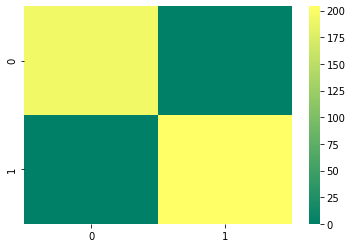

--------------------------------------------------
--------------------------------------------------
TEST
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        59
           1       0.67      0.59      0.63        74

    accuracy                           0.61       133
   macro avg       0.61      0.61      0.61       133
weighted avg       0.62      0.61      0.61       133



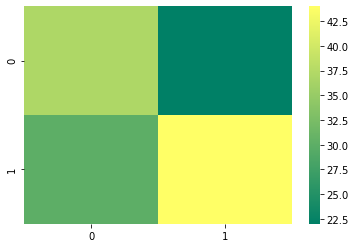

In [48]:
# fit and test model
rf.fit(X_train,y_train)
pred_r=rf.predict(X_train)
pred_e=rf.predict(X_test)
print('TRAIN')
print('-'*50)
print(classification_report(y_train,pred_r))
(sns.heatmap(confusion_matrix(y_train,pred_r),cmap='summer'))
plt.show()
print('-'*50)
print('-'*50)
print('TEST')
print('-'*50)
print(classification_report(y_test,pred_e))
(sns.heatmap(confusion_matrix(y_test,pred_e),cmap='summer'))
plt.show()

In [49]:
# ok - so this a good start!

In [50]:
# scale, rfe, and transform

In [51]:
# import scaling modules
from sklearn.preprocessing import *

In [52]:
# initialize scalers
pt=PowerTransformer()
qt=QuantileTransformer()
ss=StandardScaler()
ma=MaxAbsScaler()
mm=MinMaxScaler()
rb=RobustScaler()

In [53]:
# function to create scaled data frames
def create_scaled_df(scaler,df):
    new_df=df.copy()
    for col in new_df.columns[0:-1]:
        new_df[col]=scaler.fit_transform(new_df[[col]])
    return new_df

In [54]:
# using above function to create scaled data frames
pt_df=create_scaled_df(pt,df)
qt_df=create_scaled_df(qt,df)
ma_df=create_scaled_df(ma,df)
mm_df=create_scaled_df(mm,df)
ss_df=create_scaled_df(ss,df)
rb_df=create_scaled_df(rb,df)

In [55]:
# this will allow me to see which scaler is best
accuracy_dict={}
i=0
df_lst=['pt_df','qt_df','ss_df','ma_df','mm_df','rb_df']
for frame in [pt_df,qt_df,ss_df,ma_df,mm_df,rb_df]:
    x_temp=frame.drop('playoffs',axis=1)
    y_temp=frame.playoffs
    
    X_train_t,X_test_t,y_train_t,y_test_t=train_test_split(x_temp,y_temp,test_size=0.25,random_state=14)
    
    rf.fit(X_train_t,y_train_t)
    pred_e_t=rf.predict(X_test_t)

    accuracy_dict[df_lst[i]]=f'a:{accuracy_score(pred_e_t,y_test_t)},p:{precision_score(pred_e_t,y_test_t)},r:{recall_score(pred_e_t,y_test_t)},f:{f1_score(pred_e_t,y_test_t)}'
    i=i+1

In [56]:
# results
accuracy_dict

{'pt_df': 'a:0.6165413533834586,p:0.6081081081081081,r:0.6716417910447762,f:0.6382978723404256',
 'qt_df': 'a:0.6090225563909775,p:0.5945945945945946,r:0.6666666666666666,f:0.6285714285714286',
 'ss_df': 'a:0.6165413533834586,p:0.6081081081081081,r:0.6716417910447762,f:0.6382978723404256',
 'ma_df': 'a:0.6090225563909775,p:0.5945945945945946,r:0.6666666666666666,f:0.6285714285714286',
 'mm_df': 'a:0.6090225563909775,p:0.5945945945945946,r:0.6666666666666666,f:0.6285714285714286',
 'rb_df': 'a:0.6090225563909775,p:0.5945945945945946,r:0.6666666666666666,f:0.6285714285714286'}

In [57]:
# standard scaling looks best

In [58]:
# split X and y using standard scaling
X=ss_df.drop('playoffs',axis=1)
y=ss_df.playoffs

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

TRAIN
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       204

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



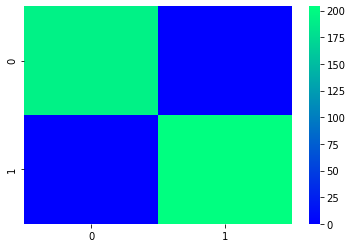

--------------------------------------------------
--------------------------------------------------
TEST
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.63      0.59        59
           1       0.67      0.61      0.64        74

    accuracy                           0.62       133
   macro avg       0.62      0.62      0.62       133
weighted avg       0.62      0.62      0.62       133



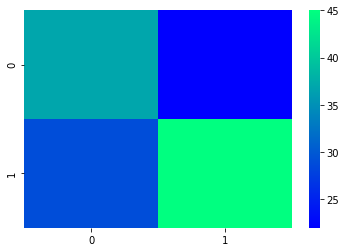

In [60]:
# fit and test model
rf.fit(X_train,y_train)
pred_r=rf.predict(X_train)
pred_e=rf.predict(X_test)
print('TRAIN')
print('-'*50)
print(classification_report(y_train,pred_r))
(sns.heatmap(confusion_matrix(y_train,pred_r),cmap='winter'))
plt.show()
print('-'*50)
print('-'*50)
print('TEST')
print('-'*50)
print(classification_report(y_test,pred_e))
(sns.heatmap(confusion_matrix(y_test,pred_e),cmap='winter'))
plt.show()

In [61]:
# marginal improvements

In [62]:
# rfe and transform

In [63]:
# import modules
from sklearn.feature_selection import RFE, RFECV

In [64]:
# a visual for how reducing features increases accuracy
rfecv=RFECV(rf)
rfecv.fit(X,y)

RFECV(cv=None,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=14,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

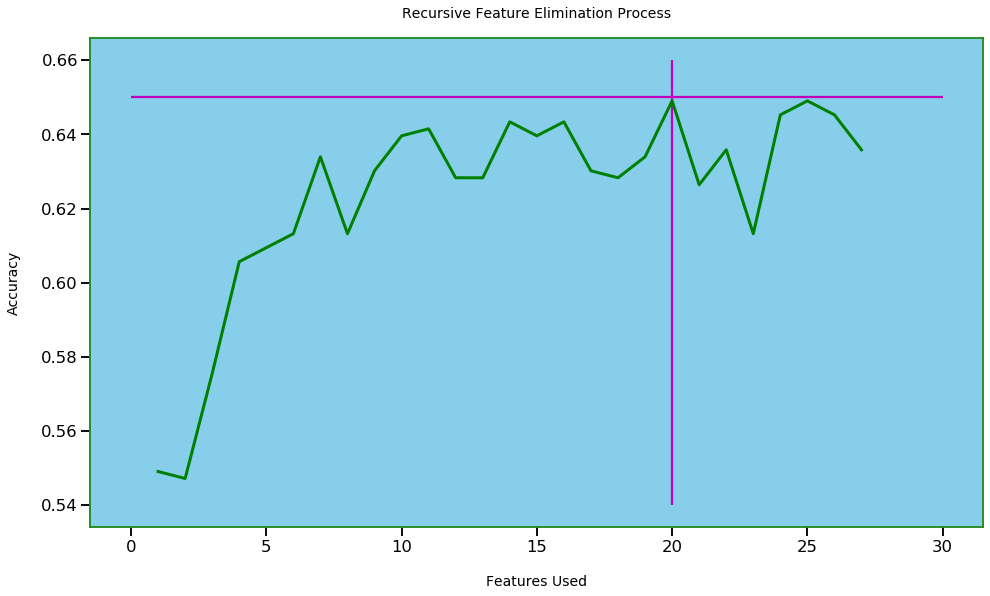

In [65]:
# a visual
with sns.plotting_context('talk'):
    with sns.axes_style({'axes.facecolor':'skyblue','axes.edgecolor':'forestgreen'}):
        plt.figure(figsize=(16, 9))
        plt.title('Recursive Feature Elimination Process', fontsize=14, pad=20)
        plt.xlabel('Features Used', fontsize=14, labelpad=20)
        plt.ylabel('Accuracy', fontsize=14, labelpad=20)
        plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='green', linewidth=3)
        plt.vlines(20,ymax=0.54,ymin=0.66,colors='m')
        plt.hlines(0.65,xmax=30,xmin=0,colors='m')

        plt.show()

In [66]:
# fit RFE
rfe=RFECV(rf,min_features_to_select=20)
rfe.fit(X,y)
rfe.support_
rfe.ranking_
ss_df.columns

Index(['age', 'gp', 'gs', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', '2p',
       '2pa', '2p%', 'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'fouls', 'pts', 'selection', 'playoffs'],
      dtype='object')

In [67]:
# find out what matters and what doesn't
support_dict={}
ranking_dict={}
for i in range(len(rfe.support_)):
    support_dict[ss_df.columns[i]]=int(rfe.support_[i])
for i in range(len(rfe.ranking_)):
    ranking_dict[ss_df.columns[i]]=rfe.ranking_[i]

In [68]:
# results
support_dict

{'age': 1,
 'gp': 1,
 'gs': 1,
 'mp': 1,
 'fg': 1,
 'fga': 1,
 'fg%': 1,
 '3p': 0,
 '3pa': 1,
 '3p%': 1,
 '2p': 1,
 '2pa': 1,
 '2p%': 1,
 'efg%': 1,
 'ft': 0,
 'fta': 1,
 'ft%': 1,
 'orb': 0,
 'drb': 1,
 'trb': 1,
 'ast': 1,
 'stl': 0,
 'blk': 0,
 'tov': 0,
 'fouls': 1,
 'pts': 1,
 'selection': 0}

In [69]:
support_dict.keys()

dict_keys(['age', 'gp', 'gs', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', '2p', '2pa', '2p%', 'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'fouls', 'pts', 'selection'])

In [70]:
# let's try again
X = X[['age', 'gp', 'gs', 'mp', 'fg', 'fga', 'fg%', '3pa', '3p%', 
       '2p', '2pa', '2p%', 'efg%', 'fta', 'ft%', 'drb',
      'trb', 'ast', 'fouls', 'pts', 'selection']]

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

TRAIN
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       204

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



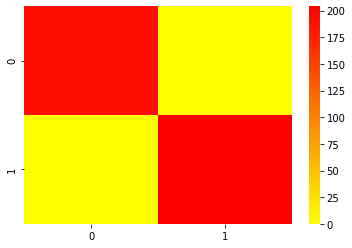

--------------------------------------------------
--------------------------------------------------
TEST
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        59
           1       0.69      0.64      0.66        74

    accuracy                           0.64       133
   macro avg       0.64      0.64      0.64       133
weighted avg       0.64      0.64      0.64       133



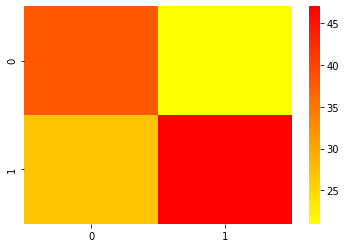

In [72]:
# fit and test model
rf.fit(X_train,y_train)
pred_r=rf.predict(X_train)
pred_e=rf.predict(X_test)
print('TRAIN')
print('-'*50)
print(classification_report(y_train,pred_r))
(sns.heatmap(confusion_matrix(y_train,pred_r),cmap='autumn_r'))
plt.show()
print('-'*50)
print('-'*50)
print('TEST')
print('-'*50)
print(classification_report(y_test,pred_e))
(sns.heatmap(confusion_matrix(y_test,pred_e),cmap='autumn_r'))
plt.show()

In [73]:
# okay - another marginal improvement

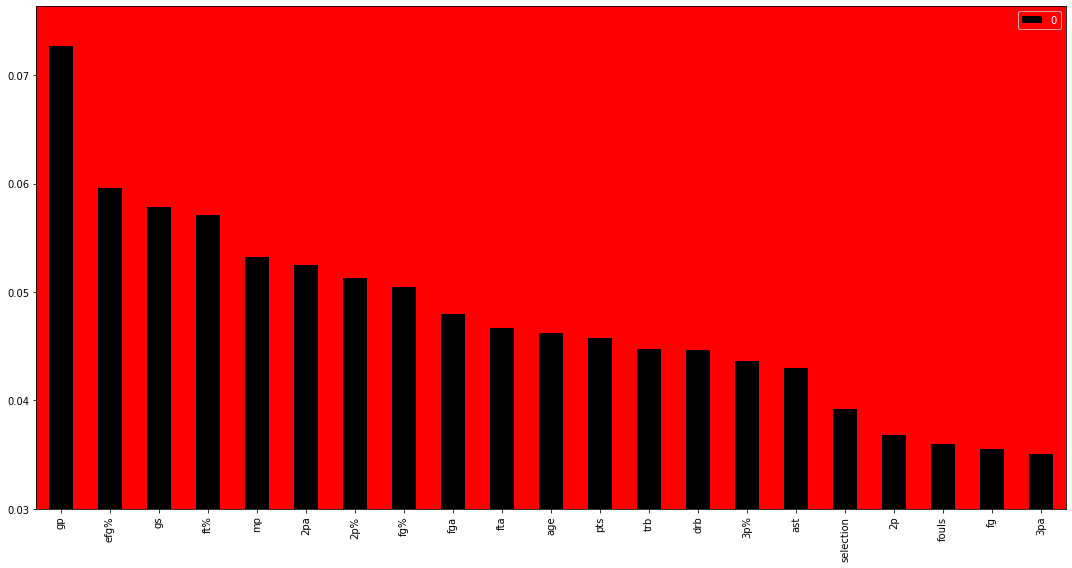

In [74]:
# find feature importances
importance_df=pd.DataFrame(rf.feature_importances_).T
importance_df.columns=X.columns
importance_df=importance_df.T.sort_values(by=0,ascending=False)
with sns.axes_style({'axes.facecolor':'red','axes.edgecolor':'black','text.color':'white'}):
    importance_df.plot(kind='bar',figsize=(15,8),color='black')
    plt.tight_layout()
    plt.ylim(0.03)
    plt.show()

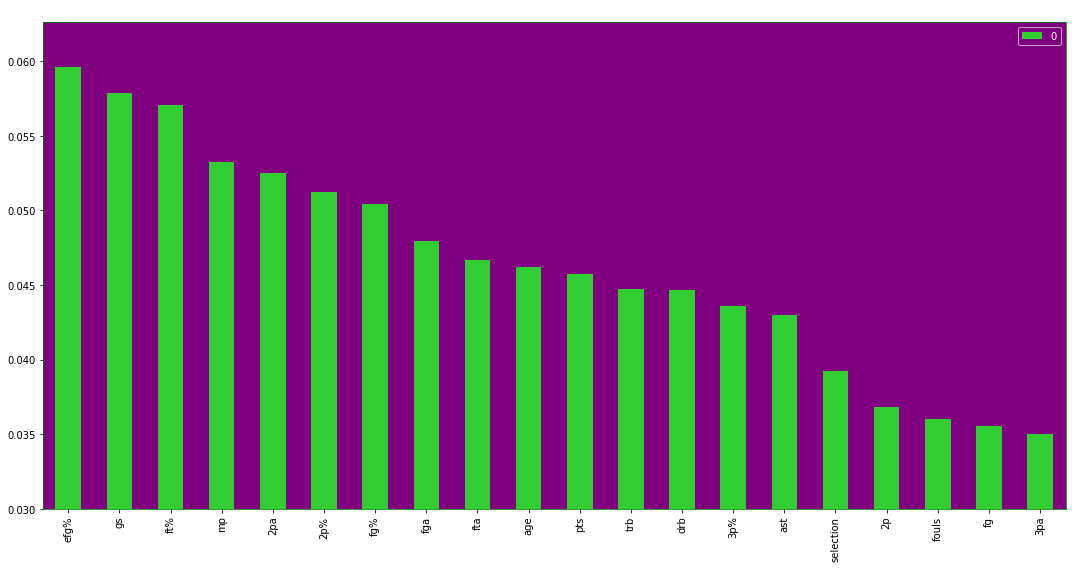

In [75]:
# find feature importances of everything except that big feature at the beginning
importance_df=pd.DataFrame(rf.feature_importances_).T
importance_df.columns=X.columns
importance_df=importance_df.T.sort_values(by=0,ascending=False)
with sns.axes_style({'axes.facecolor':'purple','axes.edgecolor':'green','text.color':'white'}):  
    importance_df.iloc[1:,:].plot(kind='bar',figsize=(15,8),color='limegreen')
    plt.title('feature importances')
    plt.ylim(0.03,)
    plt.tight_layout()
    plt.show()